# <font color=Green> Lecture 11: </font>
# <font color=Green>  Visualization of Multivariate  Data -Part 2: Line-based Plotting Techniques</font>

## Learning Objectives:
### Students will be able to :

- Given a Multivariate dataset, plot this data using Line-based technique (line plot)

    * Using multiple displays :
        * superimposed 
            * using multi-line graph, i.e. multiple lines in the same plot
            * Parallel Coordinates graph. i.e. multi-axis plot, where each variable is an axis 
        * juxtaposed
            * Using juxtaposed (side-by-side subplots) multiple line-charts 
    

## <font color =  #3498db> Plotting Multivariate Data
<div class="alert alert-block  alert-success">
Data variables can be visualized based on the graphical primitive used in the rendering, namely, points,
lines, or regions. However, to plot multiple varaiables in one visuals then we also need to apply the techniques we mentioned in week 9, which are :

   * Using multiple displays :
        * superimposed 
            * plotting multiple variables on the same plot 
        * juxtaposed
            * making multiple scatter plots side by side, one for each varaible 
   * Using dimension embedding
   
</div>

##### In this lecture we will use Line-based  (line plot) and multi-variable plotting techniques to plot multivariate data   

-------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Our Dataset

In [2]:
d = pd.read_csv("data-5vars.csv",sep=',',engine='python')

In [3]:
d

,Month,Var1,Var2,Var3,Var4
0,Jan,3.01,4.64,9.71,1.56
1,Feb,3.53,5.22,10.17,2.48
2,Mar,3.95,5.31,10.62,3.44
3,Apr,4.51,5.87,11.37,3.51
4,May,5.37,6.53,12.01,3.84
5,Jun,6.27,6.85,12.39,4.32
6,Jul,7.00,7.61,13.27,4.52
7,Aug,7.09,8.32,13.55,5.49
8,Sep,7.67,8.53,13.84,5.76
9,Oct,7.86,9.52,14.12,5.90


This data has a categorical attribute (also refered to as variable or column) which is (Month), and four quantitative attributes which are (Var1, Var2, Var3, Var4).


# <font color =  #3498db> 1- Line-based Plotting: Multivariate Data using superimposed multiple displays

## 1.1 - Using Multi-Line graph

In the following code we will plot each variable aginst its index (Month) as a line on one display (figure). To distinguish the variables, we will use different line attributes (color, style, marker, width/size) for the line of each variable, then use legend to identify them.

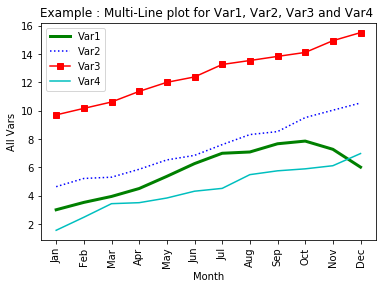

In [4]:
# Plot  "Var1", "Var2","Var3","Var4" data Vs. "Index" or "Month"
var1, = plt.plot( d["Var1"],linewidth=3, color="green",label="Var1")  # also changing linewidth
var2, = plt.plot( d["Var2"],linestyle=":", color="b",label="Var2")    # also changing style
var3, = plt.plot( d["Var3"],marker="s", color="r",label="Var3")       # also adding marker
var4, = plt.plot( d["Var4"], color="c",label="Var4")                  # just color

x_axis = np.arange(len(d))
tick_locations = x_axis 

plt.xticks(tick_locations, d["Month"], rotation=90)
plt.title("Example : Multi-Line plot for Var1, Var2, Var3 and Var4 ")
plt.xlabel("Month")
plt.ylabel("All Vars")

# Create a legend for our chart
plt.legend(loc="best")

# Show the chart
plt.show()

#### Let's Redo the previous plot  using a loop and lists to control the line styles 
Instead of calling `plt.plot()` multiple times to plot all of the lines with specific set of arguments for each line's attribures, we can create list for each attribute settings and use a loop variable to select the needed setting form the list and pass it to `plt.plot()` as an argument. This will be useful also if the attributes to be set during runtime (i.e. not hard coded). 

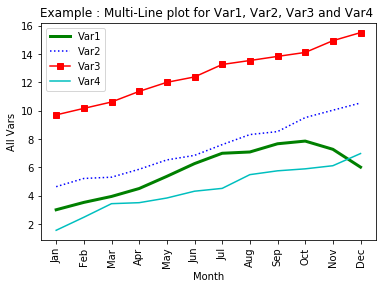

In [5]:
# Plot  "Var1", "Var2","Var3","Var4" data

colors = ['green','blue', 'red','c']
styles = ['-', ':', '-', '-']
labels = d.columns[1:]
Markers = ['','','s','']
lWidths = [3,1.5,1.5,1.5]
for i in range(4):
    var, = plt.plot( d[labels[i]],linewidth=lWidths[i], color=colors[i],linestyle=styles[i],marker = Markers[i],label=labels[i]) 

x_axis = np.arange(len(d))
tick_locations = x_axis #[value for value in x_axis]

plt.xticks(tick_locations, d["Month"], rotation=90)
plt.title("Example : Multi-Line plot for Var1, Var2, Var3 and Var4 ")
plt.xlabel("Month")
plt.ylabel("All Vars")
# Create a legend for our chart
plt.legend(loc="best")

# Show the chart
plt.show()

---

## 1.2 - Using Parallel coordinates: 

Parallel coordinates uses multi-axis and as parallel axes and assign each variable to an axis. Then a  jagged line representing item (value from each variable, each value as point on the variable axis, and the line connect item points).

* __major challenge__: is axis ordering, i.e. which axis goes before or next to other axes, because this will effect the resulting plot. 
* __scalability__:
    * dozens of variables (axes)
    * hundreds of items

#### Example: Plotting all data variables (Var1,Var2,Var3,Var4) using parallel coordinates 

Text(0,0.5,'Values')

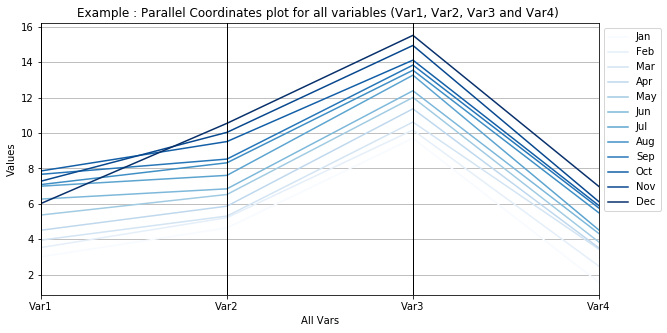

In [6]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
pc = parallel_coordinates(d.iloc[:,[0,1,2,3,4]], 'Month', colormap='Blues')
#pc.legend().remove()

# To put the legend below the figure un comment the following line
#pc.legend(bbox_to_anchor=(0, -.1), loc = "upper left", ncol = 6)

# this line puts the legend to the right of the figure and outside
pc.legend(bbox_to_anchor=(1,1), loc = "upper left", ncol = 1)

plt.title("Example : Parallel Coordinates plot for all variables (Var1, Var2, Var3 and Var4) ")
plt.xlabel("All Vars")
plt.ylabel("Values")

---

# <font color =  #3498db> 2- Line-based Plotting: Multivariate Data using Juxtaposed multiple displays

Lets plot the four variables (`Var1, Var2, Var3 and Var4`) in juxtaposed displays (subplots)

#### Example 1:  Using 4x1 Grid with shared x-axis  labels

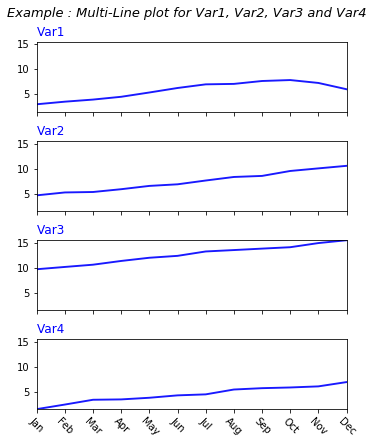

In [46]:

figure1 = plt.figure(figsize = (5,6))
figIdx=0
#find the largest and smallest values in the dataframe to use it as limits of the y-axis
maxy = max(d[d.columns[1:]].max())
# Note: d[d.columns[1:]].max() will find the max value of each column
#      Then we need to get the max of all columns, so we used max(d[d.columns[1:]].max())
#       the same for miny
miny = min(d[d.columns[1:]].min())

for column in d.columns[1:]:
    figIdx+=1  # subplots index starts from 1
    # select a spot on the grid of 4x1 indexed by figIdx
    display = plt.subplot(4,1, figIdx)
     
    # Plot the lineplot i the current display
    plt.plot(d['Month'], d[column], marker='', color='b', linewidth=1.9, alpha=0.9, label=column)
    
    #set all subplots x-axes with simlar limits
    plt.xlim(0,11)
    
    #set all subplots y-axes with simlar limits
    plt.ylim(miny,maxy)
    
    #rotate x-axis label 
    plt.tick_params(axis ='x' ,labelrotation =-45)
    
    #remove labels from x-axis from all but last subplot
    if figIdx != 4 :
          plt.tick_params(labelbottom=False)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color='b' )
plt.tight_layout(pad=1.0) 
#General title
plt.suptitle("Example : Multi-Line plot for Var1, Var2, Var3 and Var4", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.show()


#### Example 2: Using 2x2 Grid with shared x-axis and y-axis labels

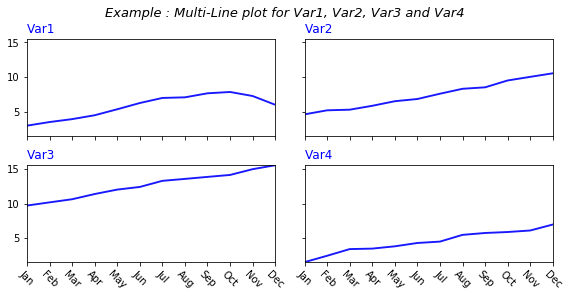

In [52]:

figure1 = plt.figure(figsize = (8,4))
figIdx=0
maxy = max(d[d.columns[1:]].max())
miny = min(d[d.columns[1:]].min())
for column in d.columns[1:]:
    figIdx+=1
 
    # Find the right spot on the plot
    plt.subplot(2,2, figIdx)
 
    # Plot the lineplot
    plt.plot(d['Month'], d[column], marker='', color='b', linewidth=1.9, alpha=0.9, label=column)
 
    
    plt.xlim(0,11)
    plt.ylim(miny,maxy)
    plt.tick_params(axis ='x' ,labelrotation =-45)

    #reove x label from top subplots
    if figIdx not in [3,4] :
        plt.tick_params(labelbottom=False)
     #reove y label from right subplots
    if figIdx not in [1,3] :
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color='b' )
plt.tight_layout(pad=1.0) 
#General title
plt.suptitle("Example : Multi-Line plot for Var1, Var2, Var3 and Var4", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
plt.show()

------------